# Machine Learning Course - Project.

## Part 1: Supervised Learning - Classifying Text or Images
### Classify News Headlines into Categories

### Library Imports

In [1]:
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Zein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the AG News dataset
ds = load_dataset("wangrongsheng/ag_news")

In [3]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(ds['train'])

In [4]:
df.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [5]:
df.tail()

,text,label
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1
119999,Nets get Carter from Raptors INDIANAPOLIS -- A...,1


In [6]:
# Check the distribution of categories
df['label'].value_counts()

label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64

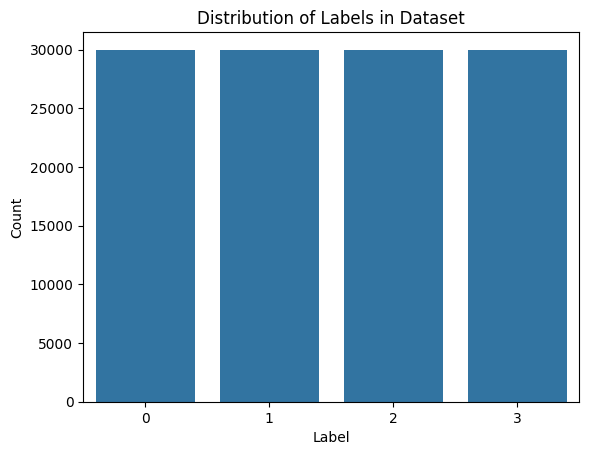

In [7]:
sns.countplot(x=df["label"])
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Dataset")
plt.show()

All labels in dataset are equally distributed.

#### Preprocessing
Tokenization and TF-IDF Vectorization

In [8]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

In [ ]:
# determines the TF-IDF scores for words in the dataset, converts it to numerical values.
X = tfidf.fit_transform(df['text']).toarray() 


In [10]:
y = df['label']

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train and Evaluate Models

##### Logistic Regression

In [12]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred_log_reg = log_reg.predict(X_test)

##### Decision Tree

In [14]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred_dt = dt.predict(X_test)

#####  Gradient Boosting

In [16]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [17]:
y_pred_gb = gb.predict(X_test)

##### K-Nearest Neighbors (KNN)

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred_knn = knn.predict(X_test)

#### Evaluate Models

In [20]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(classification_report(y_true, y_pred))
    print("=" * 60)

In [21]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

Model: Logistic Regression
Accuracy: 0.8685
Precision: 0.8682
Recall: 0.8685
F1-Score: 0.8683
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5956
           1       0.92      0.94      0.93      6058
           2       0.83      0.83      0.83      5911
           3       0.84      0.83      0.84      6075

    accuracy                           0.87     24000
   macro avg       0.87      0.87      0.87     24000
weighted avg       0.87      0.87      0.87     24000



In [22]:
# Evaluate Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")

Model: Decision Tree
Accuracy: 0.7937
Precision: 0.7934
Recall: 0.7937
F1-Score: 0.7936
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      5956
           1       0.86      0.87      0.86      6058
           2       0.75      0.75      0.75      5911
           3       0.76      0.75      0.76      6075

    accuracy                           0.79     24000
   macro avg       0.79      0.79      0.79     24000
weighted avg       0.79      0.79      0.79     24000



In [23]:
# Evaluate Gradient Boosting
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

Model: Gradient Boosting
Accuracy: 0.8266
Precision: 0.8277
Recall: 0.8266
F1-Score: 0.8267
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      5956
           1       0.88      0.90      0.89      6058
           2       0.80      0.80      0.80      5911
           3       0.76      0.80      0.78      6075

    accuracy                           0.83     24000
   macro avg       0.83      0.83      0.83     24000
weighted avg       0.83      0.83      0.83     24000



In [24]:
# Evaluate K-Nearest Neighbors
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

Model: K-Nearest Neighbors
Accuracy: 0.7180
Precision: 0.7721
Recall: 0.7180
F1-Score: 0.7259
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      5956
           1       0.89      0.63      0.73      6058
           2       0.52      0.85      0.65      5911
           3       0.80      0.72      0.76      6075

    accuracy                           0.72     24000
   macro avg       0.77      0.72      0.73     24000
weighted avg       0.77      0.72      0.73     24000



Logistic Regression is the best performer overall.

- Highest accuracy , meaning it makes the least errors.
- Highest F1-score , indicating a good balance between precision and recall.

Decision Tree performs better than KNN but worse than Gradient Boosting.

- Accuracy (79.37%) is better than KNN (71.80%) but still below Gradient Boosting.
- More balanced precision & recall compared to KNN.

KNN is the weakest model.

Lowest accuracy (71.80%) and lowest F1-score (72.59%).